# Importing library

In [1]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)
import pandas as pd

In [2]:
from fetch_data import load_lifesat_data

lifesat = load_lifesat_data()

In [3]:
lifesat

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6
5,Portugal,32181.154537,5.4
6,Poland,32238.157259,6.1
7,Estonia,35638.421351,5.7
8,Spain,36215.447591,6.3
9,Slovenia,36547.738956,5.9


In [4]:
lifesat.describe()

,GDP per capita (USD),Life satisfaction
count,27.000000,27.000000
mean,41564.521771,6.566667
std,9631.452319,0.765607
min,26456.387938,5.400000
25%,33938.289305,5.900000
50%,41627.129269,6.800000
75%,49690.580269,7.300000
max,60235.728492,7.600000


In [5]:
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

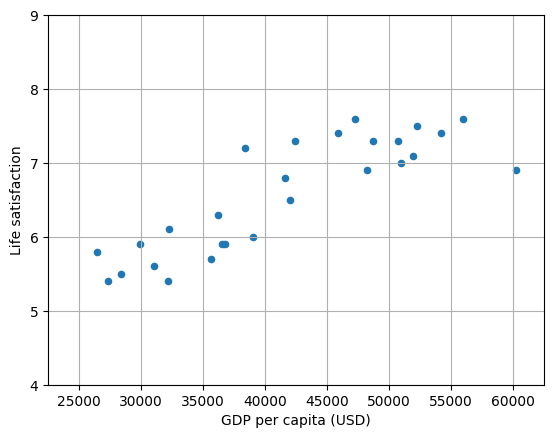

In [6]:
lifesat.plot(x="GDP per capita (USD)", y="Life satisfaction", kind="scatter")
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life satisfaction")
plt.axis([22500, 62500, 4, 9])
plt.grid()
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

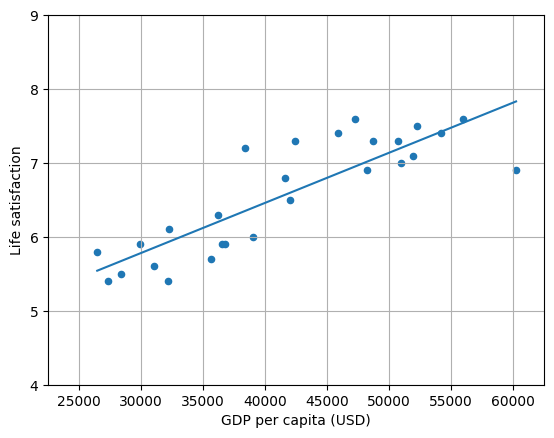

In [8]:
lifesat.plot(x="GDP per capita (USD)", y="Life satisfaction", kind="scatter")
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life satisfaction")
plt.plot(X, lin_reg.predict(X))
plt.axis([22500, 62500, 4, 9])
plt.grid()
plt.show()

In [9]:
from sklearn.neighbors import KNeighborsRegressor

kmeans_reg = KNeighborsRegressor()
kmeans_reg.fit(X, y)

KNeighborsRegressor()

In [10]:
import urllib.request
from pathlib import Path

datapath = Path() / "datasets" / "lifesat"
datapath.mkdir(parents=True, exist_ok=True)

data_root = "https://github.com/ageron/data/raw/main/"
for filename in ("oecd_bli.csv", "gdp_per_capita.csv"):
    if not (datapath / filename).is_file():
        print("Downloading", filename)
        url = data_root + "lifesat/" + filename
        urllib.request.urlretrieve(url, datapath / filename)

In [11]:
oecd_bli = pd.read_csv(datapath / "oecd_bli.csv")
gdp_per_capita = pd.read_csv(datapath / "gdp_per_capita.csv")

In [12]:
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.7,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.0,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN


In [13]:
gdp_per_capita.head()

,Entity,Code,Year,"GDP per capita, PPP (constant 2017 international $)"
0,Afghanistan,AFG,2002,1189.784668
1,Afghanistan,AFG,2003,1235.810063
2,Afghanistan,AFG,2004,1200.278013
3,Afghanistan,AFG,2005,1286.793659
4,Afghanistan,AFG,2006,1315.789117


In [14]:
gdp_year = 2020
gdppc_col = "GDP per capita"
lifesat_col = "Life satisfaction"

gdp_per_capita = gdp_per_capita[gdp_per_capita["Year"] == gdp_year]
gdp_per_capita = gdp_per_capita.drop(["Code", "Year"], axis=1)
gdp_per_capita.columns = ["Country", gdppc_col]
gdp_per_capita.set_index("Country", inplace=True)

gdp_per_capita.head()

,GDP per capita
Country,
Afghanistan,1978.961579
Africa Eastern and Southern,3387.594670
Africa Western and Central,4003.158913
Albania,13295.410885
Algeria,10681.679297


In [15]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

oecd_bli.head()

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3


In [16]:
full_country_stats = pd.merge(
    left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True
)
full_country_stats.sort_values(by=gdppc_col, inplace=True)
full_country_stats = full_country_stats[[gdppc_col, lifesat_col]]

full_country_stats.head()

,GDP per capita,Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5


In [22]:
min_gdp = 23500
max_gdp = 62500

country_stats = full_country_stats[
    (full_country_stats[gdppc_col] >= min_gdp)
    & (full_country_stats[gdppc_col] <= max_gdp)
]
country_stats.head()

,GDP per capita,Life satisfaction
Country,,
Russia,26456.387938,5.8
Greece,27287.083401,5.4
Turkey,28384.987785,5.5
Latvia,29932.493910,5.9
Hungary,31007.768407,5.6


In [25]:
country_stats.to_csv(datapath / "lifesat.csv")
full_country_stats.to_csv(datapath / "lifesat_full.csv")